#Importing Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.dates as mdates
import math
import plotly.express as px
from os import listdir
from numpy import asarray
from numpy import save
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array, ImageDataGenerator
from matplotlib import pyplot
from matplotlib.image import imread
import os as os
import random
import shutil
import glob
import tensorflow as tf
from sklearn import svm
from sklearn.naive_bayes import GaussianNB


from os import listdir  #Os — Miscellaneous operating system interfaces
from numpy import load
from os import makedirs
from os import listdir
from shutil import copyfile  
from random import seed
import numpy as np
import tensorflow as tf
# import tensorflow_text as tf_text
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam, Nadam
from tensorflow.keras.metrics import categorical_crossentropy  
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import cv2 as cv
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
warnings.simplefilter(action = 'ignore', category=FutureWarning)

# Import the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
import pickle
from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from itertools import chain

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv("/content/drive/MyDrive/IEEE/Musical_instruments_reviews.csv")
df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [4]:
df.dropna()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5.0,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5.0,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5.0,No more pops when I record my vocals.,1392940800,"02 21, 2014"
...,...,...,...,...,...,...,...,...,...
10256,A14B2YH83ZXMPP,B00JBIVXGC,Lonnie M. Adams,"[0, 0]","Great, just as expected. Thank to all.",5.0,Five Stars,1405814400,"07 20, 2014"
10257,A1RPTVW5VEOSI,B00JBIVXGC,Michael J. Edelman,"[0, 0]",I've been thinking about trying the Nanoweb st...,5.0,"Long life, and for some players, a good econom...",1404259200,"07 2, 2014"
10258,AWCJ12KBO5VII,B00JBIVXGC,Michael L. Knapp,"[0, 0]",I have tried coated strings in the past ( incl...,4.0,Good for coated.,1405987200,"07 22, 2014"
10259,A2Z7S8B5U4PAKJ,B00JBIVXGC,"Rick Langdon ""Scriptor""","[0, 0]","Well, MADE by Elixir and DEVELOPED with Taylor...",4.0,Taylor Made,1404172800,"07 1, 2014"


In [5]:
from spacy.lang.en import English

In [6]:
nlp = English()

In [7]:
#Create by processing a string of text with the nlp object
doc = nlp("Hello World!")
print(doc)

Hello World!


In [8]:
print(doc.text)

Hello World!


#Learning by book

In [9]:
# shakespeare_url = "https://homl.info/shakespeare" # shortcut URL
# filepath = keras.utils.get_file("shakespeare.txt", shakespeare_url)
# with open(filepath) as f:
#   shakespeare_text = f.read()

But in this case, it will be simpler to use
Keras’s Tokenizer class. First we need to fit a tokenizer to the text: it will find all the
characters used in the text and map each of them to a different character ID, from 1
to the number of distinct characters (it does not start at 0, so we can use that value for
masking, as we will see later in this chapter)

In [10]:
# tokenizer = keras.preprocessing.text.Tokenizer(char_level=True)
# tokenizer.fit_on_texts([shakespeare_text])

Tokenizer converts the text to lowercase by
default

In [11]:
# max_id = len(tokenizer.word_index) # number of distinct characters
# print(max_id)

In [12]:
# dataset_size = tokenizer.document_count # total number of characters
# print(dataset_size)

In [13]:
# [encoded] = np.array(tokenizer.texts_to_sequences([shakespeare_text])) - 1

In [14]:
# train_size = dataset_size * 90 // 100
# dataset = tf.data.Dataset.from_tensor_slices(encoded[:train_size])

The training set now consists of a single sequence of over a million characters, so we
can’t just train the neural network directly on it: the RNN would be equivalent to a deep net with over a million layers, and we would have a single (very long) instance
to train it. Instead, we will use the dataset’s window() method to convert this long
sequence of characters into many smaller windows of text.

In [15]:
# n_steps = 100
# window_length = n_steps + 1 # target = input shifted 1 character ahead
# dataset = dataset.window(window_length, shift=1, drop_remainder=True)

How this models expect a tensor and not a dataset, wue need to use a flat_map() to convert.

In [16]:
# dataset = dataset.flat_map(lambda window: window.batch(window_length))

Remember, batch is a number of samples processed before the model is updated

In [17]:
# batch_size = 32
# dataset = dataset.shuffle(10000).batch(batch_size)
# dataset = dataset.map(lambda windows: (windows[:, :-1], windows[:, 1:]))

In [18]:
# dataset = dataset.map(
# lambda X_batch, Y_batch: (tf.one_hot(X_batch, depth=max_id), Y_batch))

In [19]:
# dataset = dataset.prefetch(1)

To predict the next character based on the previous 100 characters, we can use an
RNN with 2 GRU layers of 128 units each and 20% dropout on both the inputs (drop
out) and the hidden states (recurrent_dropout).

In [20]:
# model = keras.models.Sequential([
# keras.layers.GRU(128, return_sequences=True, input_shape=[None, max_id],
# dropout=0.2, recurrent_dropout=0.2),
# keras.layers.GRU(128, return_sequences=True,
# dropout=0.2, recurrent_dropout=0.2),
# keras.layers.TimeDistributed(keras.layers.Dense(max_id,
# activation="softmax"))
# ])


In [21]:
# model.compile(loss="sparse_categorical_crossentropy", optimizer="adam")

In [22]:
# import re

#Learning Regex

In [23]:
# phrase = "O meu nome é, Lucas Santos Lessa. Boa noite patrão"

In [24]:
# phrase = re.sub(r'[^\w\s]', '', phrase)

In [25]:
# phrase

#Tokenize the sentence

In [26]:
import nltk


In [27]:
nltk.download("punkt")
nltk.download("wordnet")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [28]:
nltk.word_tokenize("hi how are u")

['hi', 'how', 'are', 'u']

#Stopwords

In [29]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
 from nltk.corpus import stopwords

In [31]:
stop_words = stopwords.words("english")
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [32]:
# stop_words = stopwords.words("portuguese")
# print(stop_words)

#Stemmig

Reduces the words to the words stemps. Example : males ---> male
playing ---> play

In [33]:
from nltk.stem import PorterStemmer

In [34]:
stemmer = PorterStemmer()

In [35]:
input_str = "There are several types of stemming algorithms."

In [36]:
input_str = nltk.word_tokenize(input_str)

In [37]:
for word in input_str:
  print(stemmer.stem(word))

there
are
sever
type
of
stem
algorithm
.


#Lemmatization

reduce a word to a dictionary form

In [38]:
 from nltk.stem import WordNetLemmatizer

In [39]:
lemmatizer =  WordNetLemmatizer()

In [40]:
input_str = "Been had done languages cities mice"

In [41]:
input_str = nltk.word_tokenize(input_str)

In [42]:
for word in input_str:
  print(lemmatizer.lemmatize(word))

Been
had
done
language
city
mouse


#Preprocessing

In [43]:
df_pre = df.copy()

In [44]:
df_pre.head(2)

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5.0,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5.0,Jake,1363392000,"03 16, 2013"


In [45]:
df_pre = df_pre.drop(df.columns[[0, 1, 3, 5, 7, 8]], axis=1) 

In [46]:
df_pre

,reviewerName,reviewText,summary
0,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exac...",good
1,Jake,The product does exactly as it should and is q...,Jake
2,"Rick Bennette ""Rick Bennette""",The primary job of this device is to block the...,It Does The Job Well
3,"RustyBill ""Sunday Rocker""",Nice windscreen protects my MXL mic and preven...,GOOD WINDSCREEN FOR THE MONEY
4,SEAN MASLANKA,This pop filter is great. It looks and perform...,No more pops when I record my vocals.
...,...,...,...
10256,Lonnie M. Adams,"Great, just as expected. Thank to all.",Five Stars
10257,Michael J. Edelman,I've been thinking about trying the Nanoweb st...,"Long life, and for some players, a good econom..."
10258,Michael L. Knapp,I have tried coated strings in the past ( incl...,Good for coated.
10259,"Rick Langdon ""Scriptor""","Well, MADE by Elixir and DEVELOPED with Taylor...",Taylor Made


In [47]:
col0 = df_pre["reviewerName"].tolist()
col1 = df_pre["reviewText"].tolist()
col2 = df_pre["summary"].tolist()

In [48]:
col0[0]

'cassandra tu "Yeah, well, that\'s just like, u...'

In [49]:
nltk.word_tokenize(col0[0])

['cassandra',
 'tu',
 '``',
 'Yeah',
 ',',
 'well',
 ',',
 'that',
 "'s",
 'just',
 'like',
 ',',
 'u',
 '...']

In [50]:
phrase = re.sub(r'[^\w\s]', '', col0[0])
phrase

'cassandra tu Yeah well thats just like u'

In [51]:
frase_exemplo = "myself cassandra tu Yeah well thats just like u ourselves "

In [52]:
frase_exemplo = frase_exemplo.split()

In [53]:
frase_exemplo

['myself',
 'cassandra',
 'tu',
 'Yeah',
 'well',
 'thats',
 'just',
 'like',
 'u',
 'ourselves']

In [54]:
new_frase_exemplo = []
for i in frase_exemplo:
  if i not in stop_words:
    new_frase_exemplo.append(i)
frase_exemplo = new_frase_exemplo    

In [55]:
frase_exemplo

['cassandra', 'tu', 'Yeah', 'well', 'thats', 'like', 'u']

In [56]:
# new_col0 = []
# for i in col0:
#   new_col0.append(nltk.word_tokenize(i))

#Preprocessing direct

In [57]:
pd.set_option('display.max_colwidth', -1)
#using only v1 and v2 column
df= df [['reviewerName','reviewText', 'overall', 'summary']]
df.head(2)

,reviewerName,reviewText,overall,summary
0,"cassandra tu ""Yeah, well, that's just like, u...","Not much to write about here, but it does exactly what it's supposed to. filters out the pop sounds. now my recordings are much more crisp. it is one of the lowest prices pop filters on amazon so might as well buy it, they honestly work the same despite their pricing,",5.0,good
1,Jake,"The product does exactly as it should and is quite affordable.I did not realized it was double screened until it arrived, so it was even better than I had expected.As an added bonus, one of the screens carries a small hint of the smell of an old grape candy I used to buy, so for reminiscent's sake, I cannot stop putting the pop filter next to my nose and smelling it after recording. :DIf you needed a pop filter, this will work just as well as the expensive ones, and it may even come with a pleasing aroma like mine did!Buy this product! :]",5.0,Jake


##Removing pontuations

In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
df_preprocessing = df.copy()

In [60]:
df_preprocessing['reviewerName'].isna().sum()

27

In [61]:
df_preprocessing['reviewText'].isna().sum()

7

In [62]:
df_preprocessing['summary'].isna().sum()

0

It is necessary remove all the nan values

In [63]:
df_preprocessing = df_preprocessing.dropna()

In [64]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df_preprocessing['reviewerName']= df_preprocessing['reviewerName'].apply(lambda x:remove_punctuation(x))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [65]:
df_preprocessing['reviewText']= df_preprocessing['reviewText'].apply(lambda x:remove_punctuation(x))
df_preprocessing['summary']= df_preprocessing['summary'].apply(lambda x:remove_punctuation(x))

In [66]:
df_preprocessing.head(2)

,reviewerName,reviewText,overall,summary
0,cassandra tu Yeah well thats just like u,Not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing,5.0,good
1,Jake,The product does exactly as it should and is quite affordableI did not realized it was double screened until it arrived so it was even better than I had expectedAs an added bonus one of the screens carries a small hint of the smell of an old grape candy I used to buy so for reminiscents sake I cannot stop putting the pop filter next to my nose and smelling it after recording DIf you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like mine didBuy this product,5.0,Jake


Every pontuation is remove now

##Lowering

In [67]:
columns = ['reviewerName', 'reviewText', 'summary']

for i in columns:
  df_preprocessing[i]= df_preprocessing[i].apply(lambda x: x.lower())


In [68]:
df_preprocessing.head()

,reviewerName,reviewText,overall,summary
0,cassandra tu yeah well thats just like u,not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing,5.0,good
1,jake,the product does exactly as it should and is quite affordablei did not realized it was double screened until it arrived so it was even better than i had expectedas an added bonus one of the screens carries a small hint of the smell of an old grape candy i used to buy so for reminiscents sake i cannot stop putting the pop filter next to my nose and smelling it after recording dif you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like mine didbuy this product,5.0,jake
2,rick bennette rick bennette,the primary job of this device is to block the breath that would otherwise produce a popping sound while allowing your voice to pass through with no noticeable reduction of volume or high frequencies the double cloth filter blocks the pops and lets the voice through with no coloration the metal clamp mount attaches to the mike stand secure enough to keep it attached the goose neck needs a little coaxing to stay where you put it,5.0,it does the job well
3,rustybill sunday rocker,nice windscreen protects my mxl mic and prevents pops only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging,5.0,good windscreen for the money
4,sean maslanka,this pop filter is great it looks and performs like a studio filter if youre recording vocals this will eliminate the pops that gets recorded when you sing,5.0,no more pops when i record my vocals


##Tests

In [69]:
import re

In [70]:
# def tokenization(text):
#     tokens = re.split('\s',text)
#     return tokens

In [71]:
# for i in columns:
#   df_preprocessing[i]= df_preprocessing[i].apply(lambda x: tokenization(x))

In [72]:
# df_preprocessing.head(1)

In [73]:
# type(df_preprocessing['reviewerName'][0][0])

In [74]:
# from sklearn.feature_extraction.text import TfidfVectorizer
# from sklearn.feature_extraction.text import CountVectorizer
# import pandas as pd
# pd.set_option("max_rows", 600)
# from pathlib import Path  
# import glob

In [75]:
# tfidf_vectorizer = TfidfVectorizer(input='reviewText', stop_words='english')

In [76]:
# tfidf_vector = tfidf_vectorizer.fit_transform(df_preprocessing)

In [77]:
# stopwords = nltk.corpus.stopwords.words('english')
# stopwords[0:10]

In [78]:
# def remove_stopwords(text):
#     output= [i for i in text if i not in stopwords]
#     return output

In [79]:
# for i in columns:
#   df_preprocessing[i].apply(lambda x: [item for item in x if item not in stopwords])


#   # df_preprocessing[i]= df_preprocessing[i].apply(lambda x:remove_stopwords(x))


In [80]:
# df_preprocessing

In [81]:
# from nltk.stem.porter import PorterStemmer

In [82]:
# porter_stemmer = PorterStemmer()

In [83]:
# def stemming(text):
#   stem_text = [porter_stemmer.stem(word) for word in text]
#   return stem_text

In [84]:
# for i in columns:
#   df_preprocessing[i]=df_preprocessing[i].apply(lambda x: stemming(x))

In [85]:
# df_preprocessing

In [86]:
# from nltk.stem import WordNetLemmatizer

In [87]:
# wordnet_lemmatizer = WordNetLemmatizer()

In [88]:
# def lemmatizer(text):
#   lemm_text = [wordnet_lemmatizer.lemmatize(word) for word in text]
#   return lemm_text

In [89]:
# for i in columns:
#   df_preprocessing[i]=df_preprocessing[i].apply(lambda x:lemmatizer(x))

In [90]:
# df_preprocessing

##Separete a DataSet, and removing stopwords and lemmatization 

In [91]:
df = df_preprocessing[['reviewText', 'overall']].copy()
df.head()

,reviewText,overall
0,not much to write about here but it does exactly what its supposed to filters out the pop sounds now my recordings are much more crisp it is one of the lowest prices pop filters on amazon so might as well buy it they honestly work the same despite their pricing,5.0
1,the product does exactly as it should and is quite affordablei did not realized it was double screened until it arrived so it was even better than i had expectedas an added bonus one of the screens carries a small hint of the smell of an old grape candy i used to buy so for reminiscents sake i cannot stop putting the pop filter next to my nose and smelling it after recording dif you needed a pop filter this will work just as well as the expensive ones and it may even come with a pleasing aroma like mine didbuy this product,5.0
2,the primary job of this device is to block the breath that would otherwise produce a popping sound while allowing your voice to pass through with no noticeable reduction of volume or high frequencies the double cloth filter blocks the pops and lets the voice through with no coloration the metal clamp mount attaches to the mike stand secure enough to keep it attached the goose neck needs a little coaxing to stay where you put it,5.0
3,nice windscreen protects my mxl mic and prevents pops only thing is that the gooseneck is only marginally able to hold the screen in position and requires careful positioning of the clamp to avoid sagging,5.0
4,this pop filter is great it looks and performs like a studio filter if youre recording vocals this will eliminate the pops that gets recorded when you sing,5.0


##Stopwords


In [92]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [93]:
stopwords = nltk.corpus.stopwords.words('english')

In [94]:
df['reviewText']= df_preprocessing['reviewText'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
df.head()

,reviewText,overall
0,much write exactly supposed filters pop sounds recordings much crisp one lowest prices pop filters amazon might well buy honestly work despite pricing,5.0
1,product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screens carries small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive ones may even come pleasing aroma like mine didbuy product,5.0
2,primary job device block breath would otherwise produce popping sound allowing voice pass noticeable reduction volume high frequencies double cloth filter blocks pops lets voice coloration metal clamp mount attaches mike stand secure enough keep attached goose neck needs little coaxing stay put,5.0
3,nice windscreen protects mxl mic prevents pops thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging,5.0
4,pop filter great looks performs like studio filter youre recording vocals eliminate pops gets recorded sing,5.0


##Lemmatizer

In [95]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [96]:
lemmatizer = WordNetLemmatizer()
df['reviewText'] = df['reviewText'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
df.head()

,reviewText,overall
0,much write exactly supposed filter pop sound recording much crisp one lowest price pop filter amazon might well buy honestly work despite pricing,5.0
1,product exactly quite affordablei realized double screened arrived even better expectedas added bonus one screen carry small hint smell old grape candy used buy reminiscents sake cannot stop putting pop filter next nose smelling recording dif needed pop filter work well expensive one may even come pleasing aroma like mine didbuy product,5.0
2,primary job device block breath would otherwise produce popping sound allowing voice pas noticeable reduction volume high frequency double cloth filter block pop let voice coloration metal clamp mount attache mike stand secure enough keep attached goose neck need little coaxing stay put,5.0
3,nice windscreen protects mxl mic prevents pop thing gooseneck marginally able hold screen position requires careful positioning clamp avoid sagging,5.0
4,pop filter great look performs like studio filter youre recording vocal eliminate pop get recorded sing,5.0


##Steamming

In [97]:
ps = PorterStemmer()
df['reviewText']= df['reviewText'].apply(lambda x: ' '.join([ps.stem(word) for word in x.split()]))
df.head()

,reviewText,overall
0,much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price,5.0
1,product exactli quit affordablei realiz doubl screen arriv even better expecteda ad bonu one screen carri small hint smell old grape candi use buy reminisc sake cannot stop put pop filter next nose smell record dif need pop filter work well expens one may even come pleas aroma like mine didbuy product,5.0
2,primari job devic block breath would otherwis produc pop sound allow voic pa notic reduct volum high frequenc doubl cloth filter block pop let voic color metal clamp mount attach mike stand secur enough keep attach goos neck need littl coax stay put,5.0
3,nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sag,5.0
4,pop filter great look perform like studio filter your record vocal elimin pop get record sing,5.0


#Graphics

In [98]:
def add_category(lista):
  new_list = []
  for i in lista:
    if i==1.0:
      new_list.append("I hate it")
    elif i==2.0:
      new_list.append("I don't like it")
    elif i == 3.0:
      new_list.append("It's okey")
    elif i == 4.0:
      new_list.append("I like it")
    elif i == 5.0:
      new_list.append("I love it")
    else:
      return -1
  return new_list


In [99]:
aux = df_preprocessing['overall'].tolist()

In [100]:
lista = add_category(aux)

In [101]:
try:
  print(lista.index(-1))
except ValueError:
  print("Não teve erro")

Não teve erro


In [102]:
df_preprocessing["overall"] = pd.DataFrame (lista, columns = ['overall'])

In [103]:
df_preprocessing.isna().sum()

reviewerName    0 
reviewText      0 
overall         34
summary         0 
dtype: int64

In [104]:
df_preprocessing.dropna()
print("Sai NaN")

Sai NaN


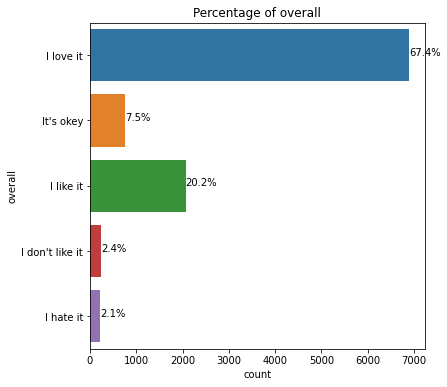

In [105]:
plt.figure(figsize=(6,6))
plt.title('Percentage of overall')
ax = sns.countplot(y = 'overall', data = df_preprocessing)
total = len(df_preprocessing)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [106]:
df_preprocessing.isnull().sum()

reviewerName    0 
reviewText      0 
overall         34
summary         0 
dtype: int64

#Training using SVM

In [107]:
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,3))
x = tfidf.fit_transform(df['reviewText'])

In [108]:
x

<10227x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 407062 stored elements in Compressed Sparse Row format>

In [109]:
y = df['overall']

In [110]:
print('Before sampling the  shape of dataset {}'.format(Counter(y)))

Before sampling the  shape of dataset Counter({5.0: 6912, 4.0: 2079, 3.0: 771, 2.0: 249, 1.0: 216})


In [111]:
sm = SMOTE()

In [112]:
x_res, y_res = sm.fit_resample(x, y)

In [113]:
print('After sampling the shape of dataset {}'.format(Counter(y_res)))

After sampling the shape of dataset Counter({5.0: 6912, 3.0: 6912, 4.0: 6912, 2.0: 6912, 1.0: 6912})


In [114]:
x_train, x_test, y_train, y_test = train_test_split(x_res, y_res, random_state=0, test_size=0.25)


In [115]:
x_train, y_train

(<25920x5000 sparse matrix of type '<class 'numpy.float64'>'
 	with 2035077 stored elements in Compressed Sparse Row format>, 18795    2.0
 31217    4.0
 9005     3.0
 12986    1.0
 2832     5.0
         ... 
 20757    2.0
 32103    4.0
 30403    4.0
 21243    2.0
 2732     5.0
 Name: overall, Length: 25920, dtype: float64)

In [116]:
classifier = svm.SVR()

In [117]:
# 85wdfv

In [118]:
clf = classifier.fit(x_train, y_train)

In [119]:
y_pred = classifier.predict(x_test)

In [120]:
from sklearn.metrics import mean_squared_error, r2_score

In [121]:
score_precision = r2_score(y_test, y_pred)
score_precision

0.9567787003502997

#Tokenization of text using Tensorflow

In [122]:
from keras.preprocessing.text import Tokenizer

In [144]:
t = Tokenizer()

In [145]:
test_text = ['Machine Learning Knowledge', 'Machine Learning', 'Deep Learning', 'Artificial Intelligence']

t.fit_on_texts(test_text)
print(test_text)

['Machine Learning Knowledge', 'Machine Learning', 'Deep Learning', 'Artificial Intelligence']


In [146]:
sequences = t.texts_to_sequences(test_text)

print("The sequences generated from text are : ",sequences)

The sequences generated from text are :  [[2, 1, 3], [2, 1], [4, 1], [5, 6]]


In [148]:
list_text = df['reviewText'].to_list()
print(list_text[:5])

['much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price', 'product exactli quit affordablei realiz doubl screen arriv even better expecteda ad bonu one screen carri small hint smell old grape candi use buy reminisc sake cannot stop put pop filter next nose smell record dif need pop filter work well expens one may even come pleas aroma like mine didbuy product', 'primari job devic block breath would otherwis produc pop sound allow voic pa notic reduct volum high frequenc doubl cloth filter block pop let voic color metal clamp mount attach mike stand secur enough keep attach goos neck need littl coax stay put', 'nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sag', 'pop filter great look perform like studio filter your record vocal elimin pop get record sing']


In [149]:
t.fit_on_texts(list_text)

In [154]:
review_tokenizer = t.texts_to_sequences(list_text)

In [155]:
review_tokenizer[10222]

[7, 126, 480]

In [128]:
df_tokenizer = pd.DataFrame(review_tokenizer) 


In [129]:
df_tokenizer

,0,1,2,3,4,5,6,7,8,9,...,1103,1104,1105,1106,1107,1108,1109,1110,1111,1112
0,23,969.0,315.0,443.0,516.0,376.0,3.0,58.0,23.0,1045.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,47,315.0,153.0,5494.0,774.0,756.0,604.0,456.0,48.0,34.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1444,140.0,296.0,1079.0,2578.0,16.0,782.0,573.0,376.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,25,1491.0,401.0,1282.0,41.0,1002.0,376.0,44.0,1589.0,3675.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,376,516.0,7.0,22.0,231.0,6.0,214.0,516.0,115.0,58.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10222,7,126.0,480.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10223,26,73.0,39.0,1233.0,5.0,68.0,59.0,109.0,17.0,163.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10224,39,594.0,5.0,599.0,229.0,468.0,118.0,3108.0,1873.0,39.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10225,12,62.0,468.0,1591.0,886.0,2.0,5.0,167.0,94.0,2703.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#Training a RNN

In [130]:
df.head()

,reviewText,overall
0,much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price,5.0
1,product exactli quit affordablei realiz doubl screen arriv even better expecteda ad bonu one screen carri small hint smell old grape candi use buy reminisc sake cannot stop put pop filter next nose smell record dif need pop filter work well expens one may even come pleas aroma like mine didbuy product,5.0
2,primari job devic block breath would otherwis produc pop sound allow voic pa notic reduct volum high frequenc doubl cloth filter block pop let voic color metal clamp mount attach mike stand secur enough keep attach goos neck need littl coax stay put,5.0
3,nice windscreen protect mxl mic prevent pop thing gooseneck margin abl hold screen posit requir care posit clamp avoid sag,5.0
4,pop filter great look perform like studio filter your record vocal elimin pop get record sing,5.0


Padding is to set a distance for all rows


In [131]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [132]:
texts = df['reviewText'].values

In [159]:
texts[0]

'much write exactli suppos filter pop sound record much crisp one lowest price pop filter amazon might well buy honestli work despit price'

In [168]:
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)

In [169]:
sequences[0]

[23,
 969,
 315,
 443,
 516,
 376,
 3,
 58,
 23,
 4,
 17,
 376,
 516,
 191,
 173,
 12,
 43,
 926,
 10,
 17]

In [135]:
tokenizer.fit_on_texts(lista)

In [175]:
padded=pad_sequences(sequences, maxlen=80, dtype='int32', padding='post', truncating='post')

In [176]:
padded[10222]

array([  7, 126, 480,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=int32)

In [182]:
x = padded

In [183]:
from sklearn.preprocessing import LabelBinarizer


In [184]:
y = LabelBinarizer().fit_transform(df['overall'])

In [185]:
y

array([[0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1],
       ...,
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 1, 0]])

In [186]:
y[0]

array([0, 0, 0, 0, 1])

In [187]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)


In [188]:
# create the model
embedding_vecor_length = 32
model = Sequential()

model.add(layers.Embedding(input_dim=1000, output_dim=64))

model.add(layers.SimpleRNN(128))

model.add(Dense(64, activation='relu'))

model.add(Dense(5, activation="softmax"))


In [189]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [190]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, None, 64)          64000     
                                                                 
 simple_rnn_1 (SimpleRNN)    (None, 128)               24704     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 5)                 325       
                                                                 
Total params: 97,285
Trainable params: 97,285
Non-trainable params: 0
_________________________________________________________________
None


In [192]:
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64)

Epoch 1/20
120/120 [==============================] - 8s 68ms/step - loss: 0.3238 - accuracy: 0.6734 - val_loss: 0.3213 - val_accuracy: 0.6824
Epoch 2/20
120/120 [==============================] - 6s 52ms/step - loss: 0.3163 - accuracy: 0.6871 - val_loss: 0.3256 - val_accuracy: 0.6805
Epoch 3/20
120/120 [==============================] - 6s 52ms/step - loss: 0.3196 - accuracy: 0.6821 - val_loss: 0.3252 - val_accuracy: 0.6817
Epoch 4/20
120/120 [==============================] - 6s 53ms/step - loss: 0.3194 - accuracy: 0.6836 - val_loss: 0.3288 - val_accuracy: 0.6758
Epoch 5/20
120/120 [==============================] - 6s 53ms/step - loss: 0.3128 - accuracy: 0.6920 - val_loss: 0.3328 - val_accuracy: 0.6734
Epoch 6/20
120/120 [==============================] - 6s 53ms/step - loss: 0.3076 - accuracy: 0.6987 - val_loss: 0.3373 - val_accuracy: 0.6699
Epoch 7/20
120/120 [==============================] - 6s 52ms/step - loss: 0.3038 - accuracy: 0.7013 - val_loss: 0.3440 - val_accuracy: 0.6652